# Final Project - DDSM

By: Elor Israeli, Roy Wesker and Maya Hayat

### Imports

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Phase 0 - Preliminaries

First, before we start to talk about the project, the most important thing we must do is study the DB as we need to understand what we're going to be exploring and in order for us to do that on the best side we must understand the subject and more specificlly the DB.

Let's import the CSV part of the dataset, we notice that our data is divided into 6 differnt tables, we'll import all of them (giving them different names) and will be exploring them one by one.

In [67]:
dicom = pd.read_csv('C:/Users/Maya/DDSM_CSV/dicom_info.csv', sep=',')

In [68]:
dicom

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,16,16,BREAST,97,20160503,115347.770,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,8,8,Left Breast,3104,20160503,115347.770,WSD,...,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.62798...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.627982...,NaN,8,8,BREAST,3744,20160503,134238.422,WSD,...,MATLAB,ROI mask images,1.3.6.1.4.1.9590.100.1.2.627982547125586065005...,1,0,ISO_IR 100,20170906.0,DDSM,1.3.6.1.4.1.9590.100.1.2.310901637111684385906...,91038.0
10233,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.82451...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.824512...,NaN,16,16,BREAST,3316,20160426,123905.617,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.824512568105677732346...,1,0,ISO_IR 100,20161004.0,DDSM,1.3.6.1.4.1.9590.100.1.2.246896536912401556922...,132704.0
10234,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24759...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.247594...,NaN,16,16,BREAST,2712,20160426,134551.632,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.247594800112988856209...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.150339554012064216510...,191922.0
10235,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.28513...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.285138...,NaN,8,8,BREAST,2736,20160426,110906.969,WSD,...,MATLAB,ROI mask images,1.3.6.1.4.1.9590.100.1.2.285138900913160236325...,1,0,ISO_IR 100,20160721.0,DDSM,1.3.6.1.4.1.9590.100.1.2.426769868613284096628...,83526.0


This table consists of 38 columns, 10237 attributes. Our aim is to extract the important details and understand what we're seeing here. In the info part we can see that some of the columns are empty therefore we can disregard them.

In [69]:
dicom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   file_path                                    10237 non-null  object 
 1   image_path                                   10237 non-null  object 
 2   AccessionNumber                              0 non-null      float64
 3   BitsAllocated                                10237 non-null  int64  
 4   BitsStored                                   10237 non-null  int64  
 5   BodyPartExamined                             10237 non-null  object 
 6   Columns                                      10237 non-null  int64  
 7   ContentDate                                  10237 non-null  int64  
 8   ContentTime                                  10237 non-null  float64
 9   ConversionType                               10237 non-null  object 
 10

In [70]:
dicom.describe()

,AccessionNumber,BitsAllocated,BitsStored,Columns,ContentDate,ContentTime,HighBit,InstanceNumber,LargestImagePixelValue,PatientBirthDate,PatientSex,PixelRepresentation,ReferringPhysicianName,Rows,SamplesPerPixel,SeriesNumber,SmallestImagePixelValue,StudyDate,StudyTime
count,0.0,10237.000000,10237.000000,10237.000000,1.023700e+04,10237.000000,10237.000000,10237.0,10237.000000,0.0,0.0,10237.0,0.0,10237.000000,10237.0,10237.0,10237.000000,9.671000e+03,9671.000000
mean,NaN,13.212465,13.212465,2179.893328,2.016047e+07,123061.253633,12.212465,1.0,42612.290222,NaN,NaN,0.0,NaN,3549.778841,1.0,1.0,9294.026473,2.016440e+07,157864.407817
std,NaN,3.812001,3.812001,1374.221082,1.110497e+02,11391.443116,3.812001,0.0,30995.808636,NaN,NaN,0.0,NaN,2363.196643,0.0,0.0,15367.554560,4.831298e+03,51545.806583
min,NaN,8.000000,8.000000,68.000000,2.016041e+07,82755.508003,7.000000,1.0,255.000000,NaN,NaN,0.0,NaN,73.000000,1.0,1.0,0.000000,2.016072e+07,82235.000000
25%,NaN,8.000000,8.000000,453.000000,2.016043e+07,113739.594000,7.000000,1.0,255.000000,NaN,NaN,0.0,NaN,441.000000,1.0,1.0,0.000000,2.016072e+07,90742.500000
50%,NaN,16.000000,16.000000,2728.000000,2.016050e+07,122935.931000,15.000000,1.0,65535.000000,NaN,NaN,0.0,NaN,4624.000000,1.0,1.0,0.000000,2.016081e+07,170335.000000
75%,NaN,16.000000,16.000000,3112.000000,2.016050e+07,132211.431000,15.000000,1.0,65535.000000,NaN,NaN,0.0,NaN,5476.000000,1.0,1.0,19687.000000,2.017083e+07,214819.000000
max,NaN,16.000000,16.000000,5431.000000,2.017092e+07,160507.857000,15.000000,1.0,65535.000000,NaN,NaN,0.0,NaN,7111.000000,1.0,1.0,59538.000000,2.017093e+07,224502.000000


In [71]:
column_names = dicom.columns
print(column_names)

Index(['file_path', 'image_path', 'AccessionNumber', 'BitsAllocated',
       'BitsStored', 'BodyPartExamined', 'Columns', 'ContentDate',
       'ContentTime', 'ConversionType', 'HighBit', 'InstanceNumber',
       'LargestImagePixelValue', 'Laterality', 'Modality', 'PatientBirthDate',
       'PatientID', 'PatientName', 'PatientOrientation', 'PatientSex',
       'PhotometricInterpretation', 'PixelRepresentation',
       'ReferringPhysicianName', 'Rows', 'SOPClassUID', 'SOPInstanceUID',
       'SamplesPerPixel', 'SecondaryCaptureDeviceManufacturer',
       'SecondaryCaptureDeviceManufacturerModelName', 'SeriesDescription',
       'SeriesInstanceUID', 'SeriesNumber', 'SmallestImagePixelValue',
       'SpecificCharacterSet', 'StudyDate', 'StudyID', 'StudyInstanceUID',
       'StudyTime'],
      dtype='object')


In [72]:
dicom = dicom.dropna(axis=1, how='all') # NaN
dicom = dicom.drop(columns=['ConversionType']) # consists of only one value therefore irrelevant


dicom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 33 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   file_path                                    10237 non-null  object 
 1   image_path                                   10237 non-null  object 
 2   BitsAllocated                                10237 non-null  int64  
 3   BitsStored                                   10237 non-null  int64  
 4   BodyPartExamined                             10237 non-null  object 
 5   Columns                                      10237 non-null  int64  
 6   ContentDate                                  10237 non-null  int64  
 7   ContentTime                                  10237 non-null  float64
 8   HighBit                                      10237 non-null  int64  
 9   InstanceNumber                               10237 non-null  int64  
 10

After having cleaned our data we'd like to see how it is distributed

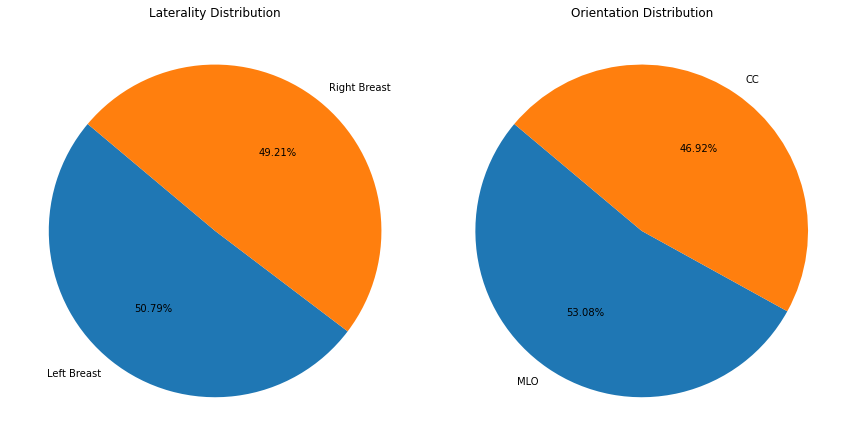

In [73]:
# Create a 2x2 grid of subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 12))
((ax1, ax2)) = ax

# Subplot 1: Laterality Distribution
laterality_counts = dicom['Laterality'].value_counts()
count_L = laterality_counts.get('L', 0)
count_R = laterality_counts.get('R', 0)

ax1.pie([count_L, count_R], labels=['Left Breast', 'Right Breast'], autopct='%1.2f%%', startangle=140)
ax1.set_title('Laterality Distribution')

# Subplot 2: Orientation Distribution
orientation_counts = dicom['PatientOrientation'].value_counts()
count_MLO = orientation_counts.get('MLO', 0)
count_CC = orientation_counts.get('CC', 0)

ax2.pie([count_MLO, count_CC], labels=['MLO', 'CC'], autopct='%1.2f%%', startangle=140)
ax2.set_title('Orientation Distribution')


# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# The mass table

In [82]:
mass = pd.read_csv('C:/Users/Maya/DDSM_CSV/mass_case_description_train_set.csv', sep=',')
mass

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,P_02033,2,RIGHT,MLO,1,mass,IRREGULAR,ILL_DEFINED,3,MALIGNANT,4,Mass-Training_P_02033_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_02033_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_02033_RIGHT_MLO_1/1.3.6.1.4.1....
1314,P_02079,2,RIGHT,CC,1,mass,ROUND,SPICULATED,3,MALIGNANT,5,Mass-Training_P_02079_RIGHT_CC/1.3.6.1.4.1.959...,Mass-Training_P_02079_RIGHT_CC_1/1.3.6.1.4.1.9...,Mass-Training_P_02079_RIGHT_CC_1/1.3.6.1.4.1.9...
1315,P_02079,2,RIGHT,MLO,1,mass,ROUND,SPICULATED,3,MALIGNANT,5,Mass-Training_P_02079_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_02079_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_02079_RIGHT_MLO_1/1.3.6.1.4.1....
1316,P_02092,2,LEFT,CC,1,mass,IRREGULAR,SPICULATED,3,MALIGNANT,2,Mass-Training_P_02092_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_02092_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_02092_LEFT_CC_1/1.3.6.1.4.1.95...


In [83]:
# Drop irrelevant columns
mass = mass.drop(['abnormality type', 'abnormality id','image file path', 'ROI mask file path', 'cropped image file path'], axis=1)
mass

,patient_id,breast_density,left or right breast,image view,mass shape,mass margins,assessment,pathology,subtlety
0,P_00001,3,LEFT,CC,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4
1,P_00001,3,LEFT,MLO,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4
2,P_00004,3,LEFT,CC,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3
3,P_00004,3,LEFT,MLO,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3
4,P_00004,3,RIGHT,MLO,OVAL,CIRCUMSCRIBED,4,BENIGN,5
...,...,...,...,...,...,...,...,...,...
1313,P_02033,2,RIGHT,MLO,IRREGULAR,ILL_DEFINED,3,MALIGNANT,4
1314,P_02079,2,RIGHT,CC,ROUND,SPICULATED,3,MALIGNANT,5
1315,P_02079,2,RIGHT,MLO,ROUND,SPICULATED,3,MALIGNANT,5
1316,P_02092,2,LEFT,CC,IRREGULAR,SPICULATED,3,MALIGNANT,2


### Explanation of Our Data

In this section of the project we will be exploring the train set of the mass data. After having removed all irrelevant columns we're left with 9 columns and 1317 entries.


• Patient_id - refers to the id of the patients in the data, note that some ids are found multiple times as some patients may have multiple tumours.

• Breast_density - the amount of fibrous and glandular tissue in the breasts, between 1 and 4.

• Left or right breast - indicates the location of the mass.

• Image view - how the images of the mammography were taken.

• Mass shape - divided into 5 different shapes.

• Mass margins - 5 different types of margins.

• Assessment - the subtality rating given by the memmographer where 0 is "subtle" and 5 is "obvious" that the tumour is malignant.

• Pathology - whether the tumour is malignant or benign.

• Subtlety - how difficult to detect an abnormality in a mammogram, where 1 is difficult and 5 is well defined.

In [102]:
mass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   patient_id            1318 non-null   object 
 1   breast_density        1318 non-null   int64  
 2   left or right breast  1318 non-null   object 
 3   image view            1318 non-null   object 
 4   mass shape            1314 non-null   object 
 5   mass margins          1275 non-null   object 
 6   assessment            1318 non-null   int64  
 7   pathology             1318 non-null   object 
 8   subtlety              1318 non-null   int64  
 9   malignant             1214 non-null   float64
dtypes: float64(1), int64(3), object(6)
memory usage: 103.1+ KB


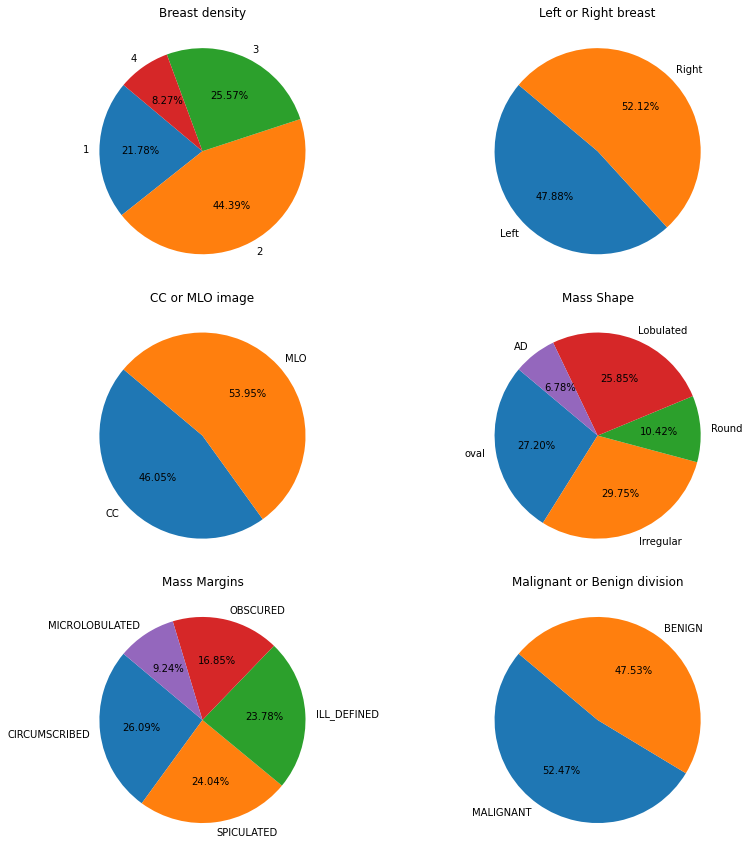

In [103]:
# Create a 2x2 grid of subplots
fig, ax = plt.subplots(3, 2, figsize=(12, 12))
((ax1, ax2),(ax3, ax4), (ax5, ax6)) = ax

# Subplot 1: Laterality Distribution
density_count = mass['breast_density'].value_counts()
count_1 = density_count.loc[1]
count_2 = density_count.loc[2]
count_3 = density_count.loc[3]
count_4 = density_count.loc[4]

ax1.pie([count_1, count_2, count_3, count_4], labels=['1', '2', '3', '4'], autopct='%1.2f%%', startangle=140)
ax1.set_title('Breast density')


# Subplot 2: Orientation Distribution
mass_side = mass['left or right breast'].value_counts()
count_Left = mass_side.get('LEFT', 0)
count_Right = mass_side.get('RIGHT', 0)

ax2.pie([count_Left, count_Right], labels=['Left', 'Right'], autopct='%1.2f%%', startangle=140)
ax2.set_title('Left or Right breast')


# Subplot 3: CC vs MLO
mass_side = mass['image view'].value_counts()
count_CC = mass_side.get('CC', 0)
count_MLO = mass_side.get('MLO', 0)

ax3.pie([count_CC, count_MLO], labels=['CC', 'MLO'], autopct='%1.2f%%', startangle=140)
ax3.set_title('CC or MLO image')


# Subplot 4: mass shape
mass_shape_count = mass['mass shape'].value_counts()
count_oval = mass_shape_count.get('OVAL', 0)
count_irregular = mass_shape_count.get('IRREGULAR', 0)
count_round = mass_shape_count.get('ROUND', 0)
count_lobulated = mass_shape_count.get('LOBULATED', 0)
count_ad = mass_shape_count.get('ARCHITECTURAL_DISTORTION', 0)

ax4.pie([count_oval, count_irregular, count_round, count_lobulated,count_ad], labels=['oval', 'Irregular', 'Round', 'Lobulated', 'AD'], autopct='%1.2f%%', startangle=140)
ax4.set_title('Mass Shape')


# Subplot 5: mass margins
mass_margin_count = mass['mass margins'].value_counts()
count_c = mass_margin_count.get('CIRCUMSCRIBED', 0)
count_s = mass_margin_count.get('SPICULATED', 0)
count_illdef = mass_margin_count.get('ILL_DEFINED', 0)
count_obscured = mass_margin_count.get('OBSCURED', 0)
count_m = mass_margin_count.get('MICROLOBULATED', 0)

ax5.pie([count_c, count_s, count_illdef, count_obscured, count_m], labels=['CIRCUMSCRIBED', 'SPICULATED', 'ILL_DEFINED', 'OBSCURED', 'MICROLOBULATED'], autopct='%1.2f%%', startangle=140)
ax5.set_title('Mass Margins')


# Subplot 6: Malignant or benign
mass_side = mass['pathology'].value_counts()
count_malignant = mass_side.get('MALIGNANT', 0)
count_benign = mass_side.get('BENIGN', 0)

ax6.pie([count_malignant, count_benign], labels=['MALIGNANT', 'BENIGN'], autopct='%1.2f%%', startangle=140)
ax6.set_title('Malignant or Benign division')


# Adjust layout and display the plot
plt.tight_layout()
plt.show()


### Assessment accuracy

In [104]:
# Creating a new column called malignant where 1 stands for malignant and 0 else
mass['malignant'] = mass['pathology'].map({'MALIGNANT': 1, 'BENIGN': 0})
mass

,patient_id,breast_density,left or right breast,image view,mass shape,mass margins,assessment,pathology,subtlety,malignant
0,P_00001,3,LEFT,CC,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,1.0
1,P_00001,3,LEFT,MLO,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,1.0
2,P_00004,3,LEFT,CC,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,0.0
3,P_00004,3,LEFT,MLO,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,0.0
4,P_00004,3,RIGHT,MLO,OVAL,CIRCUMSCRIBED,4,BENIGN,5,0.0
...,...,...,...,...,...,...,...,...,...,...
1313,P_02033,2,RIGHT,MLO,IRREGULAR,ILL_DEFINED,3,MALIGNANT,4,1.0
1314,P_02079,2,RIGHT,CC,ROUND,SPICULATED,3,MALIGNANT,5,1.0
1315,P_02079,2,RIGHT,MLO,ROUND,SPICULATED,3,MALIGNANT,5,1.0
1316,P_02092,2,LEFT,CC,IRREGULAR,SPICULATED,3,MALIGNANT,2,1.0


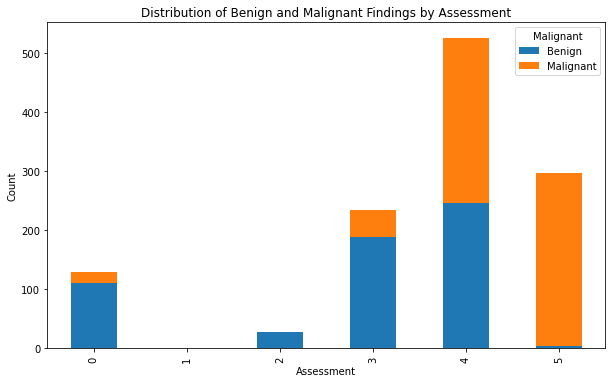

In [111]:
grouped_data = mass.groupby(['assessment', 'malignant']).size().unstack(fill_value=0)

# Plot the bar chart
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('Assessment')
plt.ylabel('Count')
plt.title('Distribution of Benign and Malignant Findings by Assessment')

# Show the legend
plt.legend(title='Malignant', labels=['Benign', 'Malignant'])

# Show the plot
plt.show()

In [112]:
percentages = (grouped_data / grouped_data.sum(axis=1)[:, None] * 100).round(2)

# Print percentages
for assessment, row in percentages.iterrows():
    print(f"Assessment {assessment}: Benign: {row[0]}%, Malignant: {row[1]}%")

Assessment 0: Benign: 85.27%, Malignant: 14.73%
Assessment 1: Benign: 0.0%, Malignant: 100.0%
Assessment 2: Benign: 100.0%, Malignant: 0.0%
Assessment 3: Benign: 80.77%, Malignant: 19.23%
Assessment 4: Benign: 46.86%, Malignant: 53.14%
Assessment 5: Benign: 1.35%, Malignant: 98.65%


<ipython-input-112-a6c0d2df87c7>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  percentages = (grouped_data / grouped_data.sum(axis=1)[:, None] * 100).round(2)


After plotting the chart we notice that as the assessment increases, the probability of the tumour being malignant increases. We have calculated above the percentages of the tumours being benign vs malignant in order to have the exact numbers for better understanding. 

The main goal of this project is to better predict whether the tumour is malignant or not so we can possibly decrease the number of women who must have surgery in order to have the cells looked under the microscope.

### Subtlety accuracy

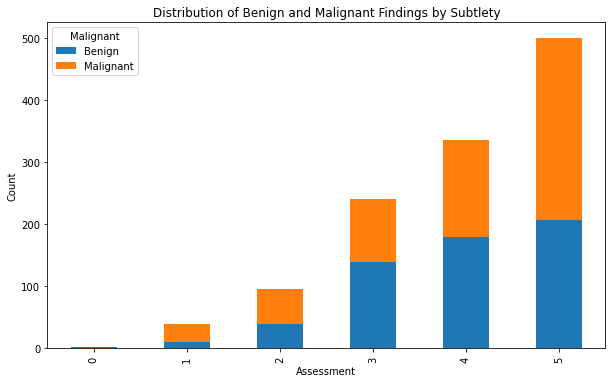

In [113]:
grouped_data_sub = mass.groupby(['subtlety', 'malignant']).size().unstack(fill_value=0)

# Plot the bar chart
ax = grouped_data_sub.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('Assessment')
plt.ylabel('Count')
plt.title('Distribution of Benign and Malignant Findings by Subtlety')

# Show the legend
plt.legend(title='Malignant', labels=['Benign', 'Malignant'])

# Show the plot
plt.show()

In [115]:
percentages = (grouped_data_sub / grouped_data_sub.sum(axis=1)[:, None] * 100).round(2)

# Print percentages
for assessment, row in percentages.iterrows():
    print(f"Assessment {assessment}: Benign: {row[0]}%, Malignant: {row[1]}%")

Assessment 0: Benign: 100.0%, Malignant: 0.0%
Assessment 1: Benign: 25.0%, Malignant: 75.0%
Assessment 2: Benign: 41.67%, Malignant: 58.33%
Assessment 3: Benign: 57.92%, Malignant: 42.08%
Assessment 4: Benign: 53.57%, Malignant: 46.43%
Assessment 5: Benign: 41.2%, Malignant: 58.8%


<ipython-input-115-c022c2abe89b>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  percentages = (grouped_data_sub / grouped_data_sub.sum(axis=1)[:, None] * 100).round(2)


## The Calc Table

In [116]:
calc = pd.read_csv('C:/Users/Maya/DDSM_CSV/calc_case_description_train_set.csv', sep=',')
calc

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00008,1,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,P_02566,2,RIGHT,MLO,1,calcification,AMORPHOUS-PLEOMORPHIC,SEGMENTAL,5,MALIGNANT,5,Calc-Training_P_02566_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_02566_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_02566_RIGHT_MLO_1/1.3.6.1.4.1....
1542,P_02572,2,LEFT,CC,1,calcification,AMORPHOUS,CLUSTERED,0,MALIGNANT,2,Calc-Training_P_02572_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_02572_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_02572_LEFT_CC_1/1.3.6.1.4.1.95...
1543,P_02572,2,LEFT,MLO,1,calcification,AMORPHOUS,CLUSTERED,0,MALIGNANT,2,Calc-Training_P_02572_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_02572_LEFT_MLO_1/1.3.6.1.4.1.9...,Calc-Training_P_02572_LEFT_MLO_1/1.3.6.1.4.1.9...
1544,P_02584,1,LEFT,CC,1,calcification,PLEOMORPHIC,SEGMENTAL,0,BENIGN,4,Calc-Training_P_02584_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_02584_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_02584_LEFT_CC_1/1.3.6.1.4.1.95...


In [117]:
# Drop irrelevant columns
calc = calc.drop(['abnormality type', 'abnormality id','image file path', 'ROI mask file path', 'cropped image file path'], axis=1)
calc

,patient_id,breast density,left or right breast,image view,calc type,calc distribution,assessment,pathology,subtlety
0,P_00005,3,RIGHT,CC,AMORPHOUS,CLUSTERED,3,MALIGNANT,3
1,P_00005,3,RIGHT,MLO,AMORPHOUS,CLUSTERED,3,MALIGNANT,3
2,P_00007,4,LEFT,CC,PLEOMORPHIC,LINEAR,4,BENIGN,4
3,P_00007,4,LEFT,MLO,PLEOMORPHIC,LINEAR,4,BENIGN,4
4,P_00008,1,LEFT,CC,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3
...,...,...,...,...,...,...,...,...,...
1541,P_02566,2,RIGHT,MLO,AMORPHOUS-PLEOMORPHIC,SEGMENTAL,5,MALIGNANT,5
1542,P_02572,2,LEFT,CC,AMORPHOUS,CLUSTERED,0,MALIGNANT,2
1543,P_02572,2,LEFT,MLO,AMORPHOUS,CLUSTERED,0,MALIGNANT,2
1544,P_02584,1,LEFT,CC,PLEOMORPHIC,SEGMENTAL,0,BENIGN,4


Note that this table is longer than the Mass's table, it contains 1545 entries.

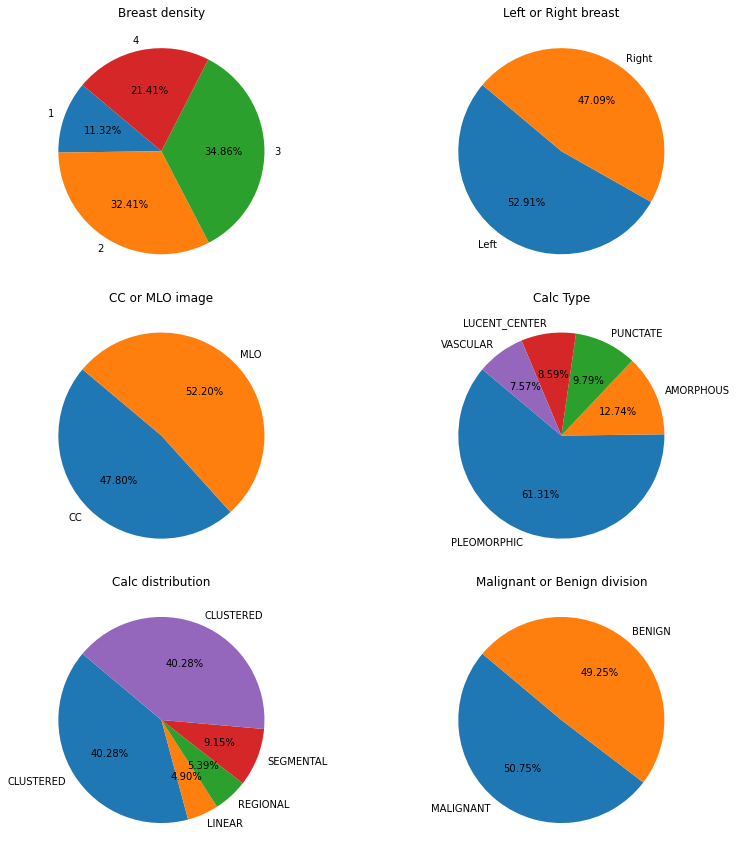

In [123]:
# Create a 3x2 grid of subplots
fig, ax = plt.subplots(3, 2, figsize=(12, 12))
((ax1, ax2),(ax3, ax4), (ax5, ax6)) = ax

# Subplot 1: Laterality Distribution
density_count = calc['breast density'].value_counts()
count_1 = density_count.loc[1]
count_2 = density_count.loc[2]
count_3 = density_count.loc[3]
count_4 = density_count.loc[4]

ax1.pie([count_1, count_2, count_3, count_4], labels=['1', '2', '3', '4'], autopct='%1.2f%%', startangle=140)
ax1.set_title('Breast density')


# Subplot 2: Orientation Distribution
calc_side = calc['left or right breast'].value_counts()
count_Left = calc_side.get('LEFT', 0)
count_Right = calc_side.get('RIGHT', 0)

ax2.pie([count_Left, count_Right], labels=['Left', 'Right'], autopct='%1.2f%%', startangle=140)
ax2.set_title('Left or Right breast')


# Subplot 3: CC vs MLO
calc_img = calc['image view'].value_counts()
count_CC = calc_img.get('CC', 0)
count_MLO = calc_img.get('MLO', 0)

ax3.pie([count_CC, count_MLO], labels=['CC', 'MLO'], autopct='%1.2f%%', startangle=140)
ax3.set_title('CC or MLO image')


# Subplot 4: calc type
calc_type_count = calc['calc type'].value_counts()
count_oval = calc_type_count.get('PLEOMORPHIC', 0)
count_irregular = calc_type_count.get('AMORPHOUS', 0)
count_round = calc_type_count.get('PUNCTATE', 0)
count_lobulated = calc_type_count.get('LUCENT_CENTER', 0)
count_ad = calc_type_count.get('VASCULAR', 0)

ax4.pie([count_oval, count_irregular, count_round, count_lobulated,count_ad], labels=['PLEOMORPHIC', 'AMORPHOUS', 'PUNCTATE', 'LUCENT_CENTER', 'VASCULAR'], autopct='%1.2f%%', startangle=140)
ax4.set_title('Calc Type')


# Subplot 5: calc distribution
calc_distribution_count = calc['calc distribution'].value_counts()
count_c = calc_distribution_count.get('CLUSTERED', 0)
count_s = calc_distribution_count.get('LINEAR', 0)
count_illdef = calc_distribution_count.get('REGIONAL', 0)
count_obscured = calc_distribution_count.get('SEGMENTAL', 0)
count_m = calc_distribution_count.get('CLUSTERED', 0)

ax5.pie([count_c, count_s, count_illdef, count_obscured, count_m], labels=['CLUSTERED', 'LINEAR', 'REGIONAL', 'SEGMENTAL', 'CLUSTERED'], autopct='%1.2f%%', startangle=140)
ax5.set_title('Calc distribution')


# Subplot 6: Malignant or benign
calc_pathology = calc['pathology'].value_counts()
count_malignant = calc_pathology.get('MALIGNANT', 0)
count_benign = calc_pathology.get('BENIGN', 0)

ax6.pie([count_malignant, count_benign], labels=['MALIGNANT', 'BENIGN'], autopct='%1.2f%%', startangle=140)
ax6.set_title('Malignant or Benign division')


# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [124]:
# Creating a new column called malignant where 1 stands for malignant and 0 else
calc['malignant'] = calc['pathology'].map({'MALIGNANT': 1, 'BENIGN': 0})
calc

,patient_id,breast density,left or right breast,image view,calc type,calc distribution,assessment,pathology,subtlety,malignant
0,P_00005,3,RIGHT,CC,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,1.0
1,P_00005,3,RIGHT,MLO,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,1.0
2,P_00007,4,LEFT,CC,PLEOMORPHIC,LINEAR,4,BENIGN,4,0.0
3,P_00007,4,LEFT,MLO,PLEOMORPHIC,LINEAR,4,BENIGN,4,0.0
4,P_00008,1,LEFT,CC,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,NaN
...,...,...,...,...,...,...,...,...,...,...
1541,P_02566,2,RIGHT,MLO,AMORPHOUS-PLEOMORPHIC,SEGMENTAL,5,MALIGNANT,5,1.0
1542,P_02572,2,LEFT,CC,AMORPHOUS,CLUSTERED,0,MALIGNANT,2,1.0
1543,P_02572,2,LEFT,MLO,AMORPHOUS,CLUSTERED,0,MALIGNANT,2,1.0
1544,P_02584,1,LEFT,CC,PLEOMORPHIC,SEGMENTAL,0,BENIGN,4,0.0


## Assessment Accuracy

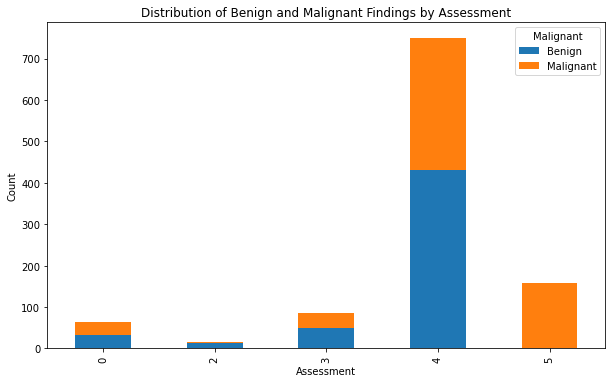

In [125]:
grouped_data = calc.groupby(['assessment', 'malignant']).size().unstack(fill_value=0)

# Plot the bar chart
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('Assessment')
plt.ylabel('Count')
plt.title('Distribution of Benign and Malignant Findings by Assessment')

# Show the legend
plt.legend(title='Malignant', labels=['Benign', 'Malignant'])

# Show the plot
plt.show()

In [126]:
percentages = (grouped_data / grouped_data.sum(axis=1)[:, None] * 100).round(2)

# Print percentages
for assessment, row in percentages.iterrows():
    print(f"Assessment {assessment}: Benign: {row[0]}%, Malignant: {row[1]}%")

Assessment 0: Benign: 50.79%, Malignant: 49.21%
Assessment 2: Benign: 93.33%, Malignant: 6.67%
Assessment 3: Benign: 57.65%, Malignant: 42.35%
Assessment 4: Benign: 57.47%, Malignant: 42.53%
Assessment 5: Benign: 1.26%, Malignant: 98.74%


<ipython-input-126-a6c0d2df87c7>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  percentages = (grouped_data / grouped_data.sum(axis=1)[:, None] * 100).round(2)


## Subtlety Accuracy

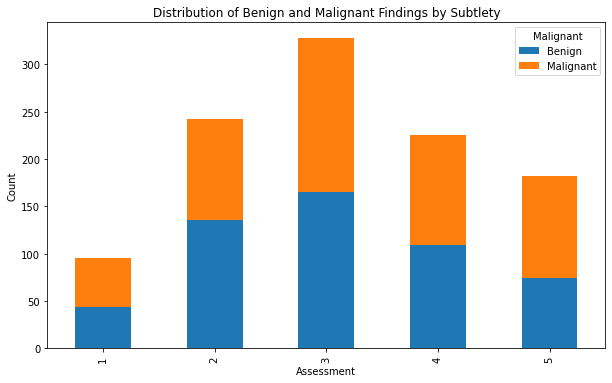

In [127]:
grouped_data_sub = calc.groupby(['subtlety', 'malignant']).size().unstack(fill_value=0)

# Plot the bar chart
ax = grouped_data_sub.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('Assessment')
plt.ylabel('Count')
plt.title('Distribution of Benign and Malignant Findings by Subtlety')

# Show the legend
plt.legend(title='Malignant', labels=['Benign', 'Malignant'])

# Show the plot
plt.show()

In [128]:
percentages = (grouped_data_sub / grouped_data_sub.sum(axis=1)[:, None] * 100).round(2)

# Print percentages
for assessment, row in percentages.iterrows():
    print(f"Assessment {assessment}: Benign: {row[0]}%, Malignant: {row[1]}%")

Assessment 1: Benign: 46.32%, Malignant: 53.68%
Assessment 2: Benign: 56.2%, Malignant: 43.8%
Assessment 3: Benign: 50.3%, Malignant: 49.7%
Assessment 4: Benign: 48.44%, Malignant: 51.56%
Assessment 5: Benign: 40.66%, Malignant: 59.34%


<ipython-input-128-c022c2abe89b>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  percentages = (grouped_data_sub / grouped_data_sub.sum(axis=1)[:, None] * 100).round(2)
